<a href="https://colab.research.google.com/github/Madhumitha0306/Customer_Churn_Analysis_and_Prediction/blob/main/Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning and Preprocessing**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np


In [ ]:
# load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Telco_Customer_Churn_Dataset .xlsx")
print("Dataset Loaded Successfully!\n")


Saving Telco_Customer_Churn_Dataset .xlsx to Telco_Customer_Churn_Dataset .xlsx
Dataset Loaded Successfully!



In [ ]:
# basic info about the dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check for missing values
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Handle Missing or Blank Values in ‘TotalCharges’
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [ ]:
# Convert 'Churn' column to 0/1 format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()


In [ ]:
# Confirm all changes
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# Save the cleaned dataset
df.to_csv("Telco_Customer_Churn_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Telco_Customer_Churn_Cleaned.csv'")


Cleaned dataset saved as 'Telco_Customer_Churn_Cleaned.csv'


**Exploratory Data Analysis (EDA)**

In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

print("Overall Churn Rate (%):")
print(churn_rate)


Overall Churn Rate (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-3859791527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


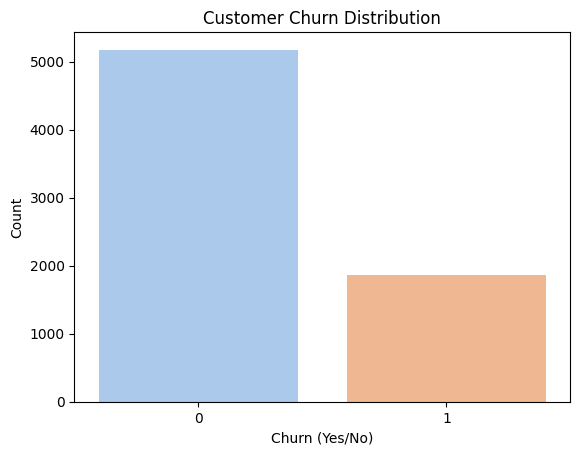

In [ ]:
# Plot churn distribution
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Count")
plt.show()


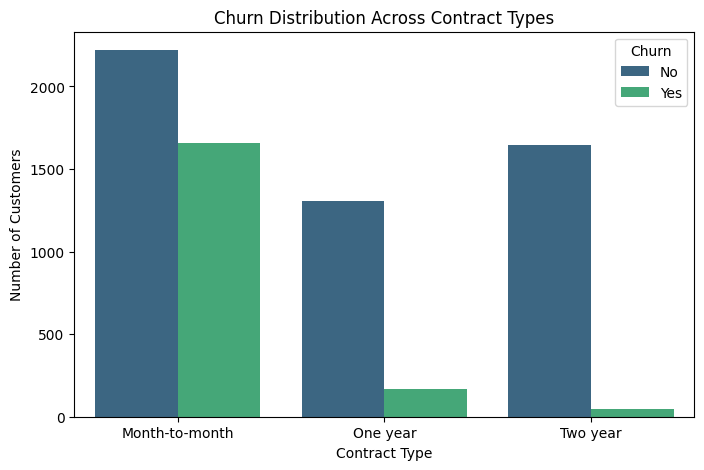

In [ ]:
# churn vs contract type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title("Churn Distribution Across Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


In [ ]:
# Calculate churn rate for each contract type
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
print(contract_churn)


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


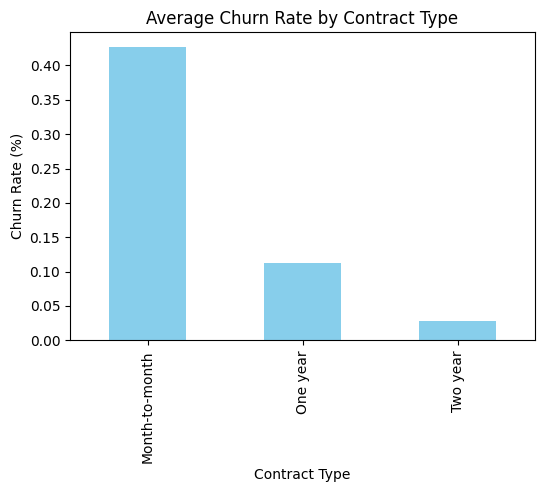

In [ ]:
# visualize churn rate by contract type
contract_churn.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Average Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.show()


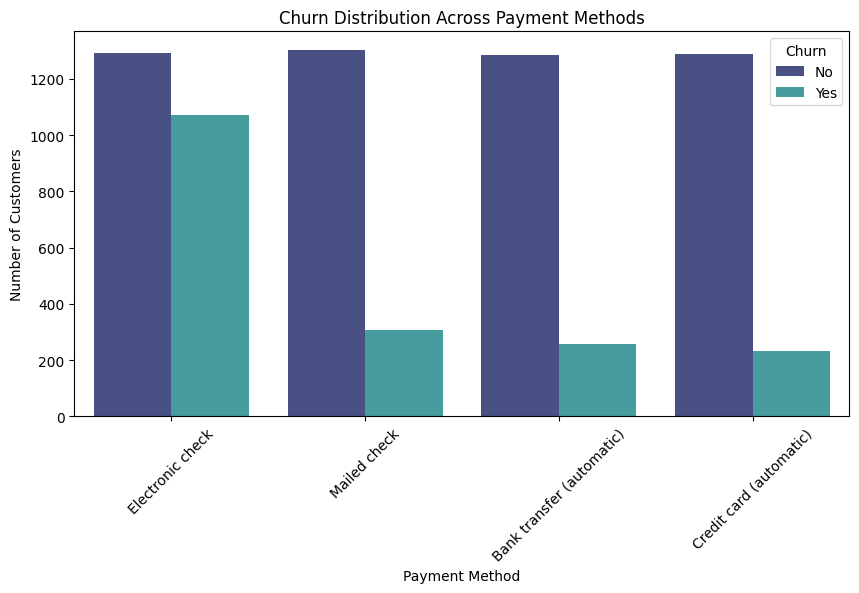

In [ ]:
# Churn vs payment method
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='mako')
plt.title("Churn Distribution Across Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()


In [ ]:
# churn rate by payment method
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
print(payment_churn)


PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64


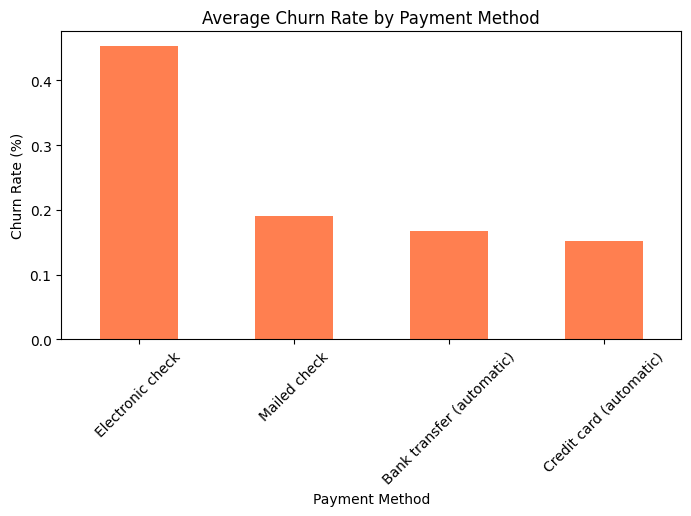

In [ ]:
# visualize churn rate by payment method
payment_churn.plot(kind='bar', color='coral', figsize=(8,4))
plt.title("Average Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()


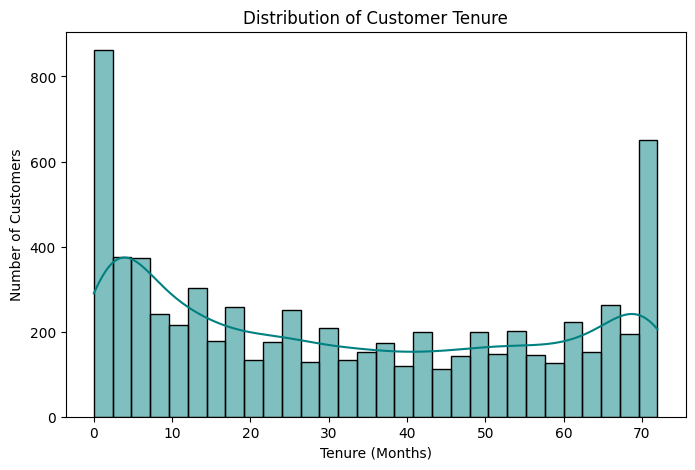

In [ ]:
# Analyze Tenure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True, color='teal')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()


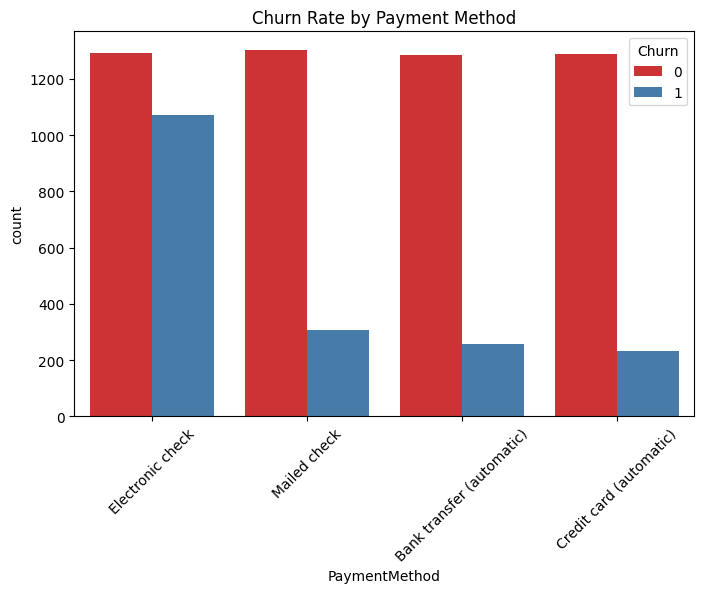

In [ ]:
# Churn vs Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set1')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()


**Customer Segmentation**

In [ ]:
# Define tenure groups
bins = [0, 12, 24, 48, 72]
labels = ['0–12 months', '13–24 months', '25–48 months', '49–72 months']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

df[['tenure', 'TenureGroup']].head(10)


,tenure,TenureGroup
0,1,0–12 months
1,34,25–48 months
2,2,0–12 months
3,45,25–48 months
4,2,0–12 months
5,8,0–12 months
6,22,13–24 months
7,10,0–12 months
8,28,25–48 months
9,62,49–72 months


In [ ]:
# Define monthly charge ranges
bins = [0, 35, 70, 105, 150]
labels = ['Low (0–35)', 'Medium (36–70)', 'High (71–105)', 'Very High (106–150)']
df['MonthlyChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)

df[['MonthlyCharges', 'MonthlyChargeGroup']].head(10)


,MonthlyCharges,MonthlyChargeGroup
0,29.85,Low (0–35)
1,56.95,Medium (36–70)
2,53.85,Medium (36–70)
3,42.30,Medium (36–70)
4,70.70,High (71–105)
5,99.65,High (71–105)
6,89.10,High (71–105)
7,29.75,Low (0–35)
8,104.80,High (71–105)
9,56.15,Medium (36–70)


In [ ]:
# View how customers are distributed across segments
print(df['TenureGroup'].value_counts())
print(df['MonthlyChargeGroup'].value_counts())


TenureGroup
0–12 months     2069
49–72 months    1941
25–48 months    1624
13–24 months    1047
Name: count, dtype: int64
MonthlyChargeGroup
High (71–105)          3065
Low (0–35)             1731
Medium (36–70)         1721
Very High (106–150)     526
Name: count, dtype: int64


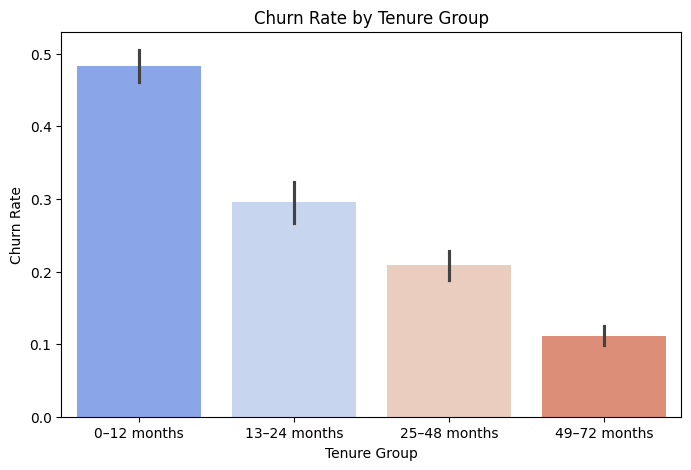

In [ ]:
# Analyze Churn by Tenure Group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='TenureGroup', y='Churn', hue='TenureGroup', palette='coolwarm', legend=False)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.show()


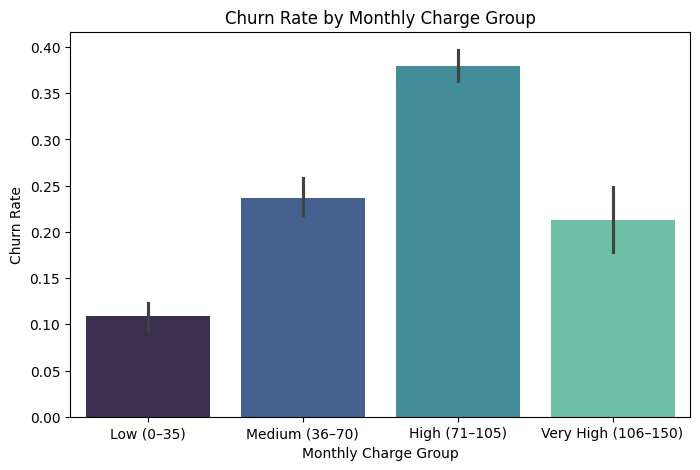

In [ ]:
# Analyze Churn by Monthly Charge Group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='MonthlyChargeGroup', y='Churn', hue='MonthlyChargeGroup', palette='mako', legend=False)
plt.title("Churn Rate by Monthly Charge Group")
plt.ylabel("Churn Rate")
plt.xlabel("Monthly Charge Group")
plt.show()


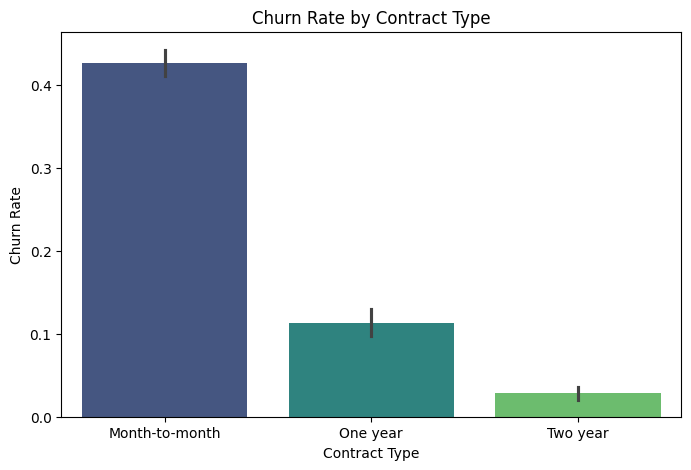

In [ ]:
# Analyze Churn by Contract Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Contract', y='Churn', hue='Contract', palette='viridis', legend=False)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


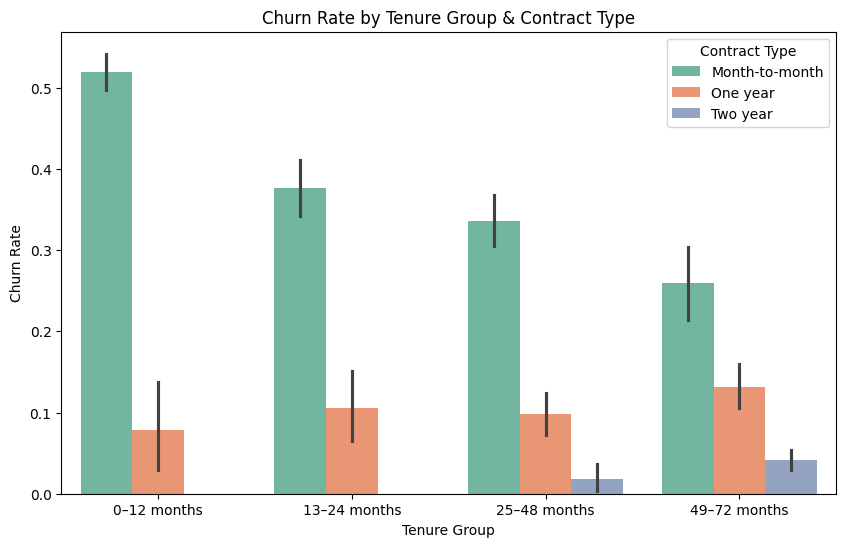

In [ ]:
# Combined Segmentation Analysis
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='TenureGroup', y='Churn', hue='Contract', palette='Set2')
plt.title("Churn Rate by Tenure Group & Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.legend(title="Contract Type")
plt.show()


**Churn Prediction Model**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop segmentation columns if they exist
drop_cols = ['TenureGroup', 'MonthlyChargeGroup']
df_encoded = df_encoded.drop(columns=[col for col in drop_cols if col in df_encoded.columns])

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# defining features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (5634, 7072)
Testing set: (1409, 7072)


In [ ]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# build logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# make predictions
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7842441447835344

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1035
           1       0.72      0.30      0.43       374

    accuracy                           0.78      1409
   macro avg       0.76      0.63      0.65      1409
weighted avg       0.77      0.78      0.75      1409



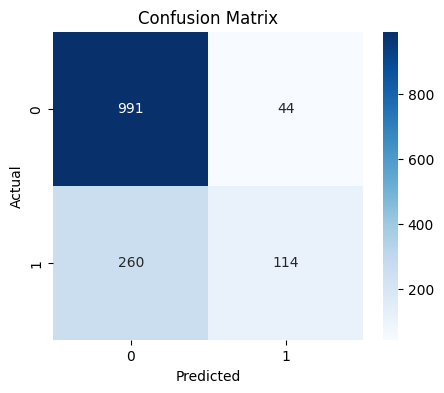

In [ ]:
# confusion matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


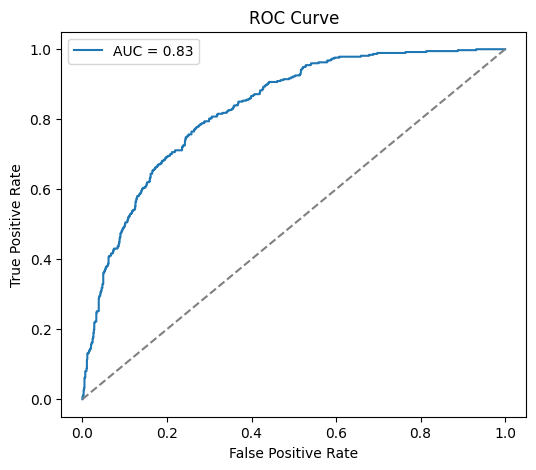

In [ ]:
# ROC Curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
# final model summary
print("Logistic Regression Model Summary")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.2f}")


Logistic Regression Model Summary
Accuracy: 0.78
AUC Score: 0.83


**Customer Retention Strategies**

In [ ]:
# check size and dtypes
print("Number of rows:", len(df))
display(df.dtypes)


Number of rows: 7043


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Fix Churn if it's still object (Yes/No)
if df['Churn'].dtype == 'O':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# convert columns that must be numeric; coerce errors to NaN
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Fill reasonable missing values (vectorized and safe)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
if 'tenure' in df.columns:
    df['tenure'] = df['tenure'].fillna(df['tenure'].median()).astype(int)
if 'MonthlyCharges' in df.columns:
    df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())

print("Dtypes after conversion:")
display(df.dtypes)


Dtypes after conversion:


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# simple LTV: MonthlyCharges * tenure
df['LTV'] = df['MonthlyCharges'] * df['tenure']

# quick sanity
display(df['LTV'].describe().round(2))


,LTV
count,7043.00
mean,2279.58
std,2264.73
min,0.00
25%,394.00
50%,1393.60
75%,3786.10
max,8550.00


Top numeric features correlated (abs Pearson) with Churn:


,Churn
tenure,0.352229
TotalCharges,0.199037
LTV,0.198514
MonthlyCharges,0.193356
SeniorCitizen,0.150889


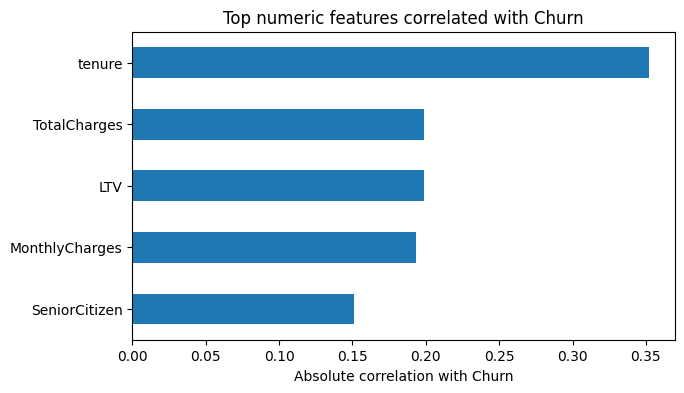

In [ ]:
# select numeric columns and compute correlation with 'Churn'
num = df.select_dtypes(include=[np.number])
if 'Churn' not in num.columns:
    raise ValueError("Churn column missing from numeric selection")

corr_with_churn = num.corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)
top_num = corr_with_churn.head(10)
print("Top numeric features correlated (abs Pearson) with Churn:")
display(top_num)

# plot
plt.figure(figsize=(7,4))
top_num.sort_values().plot(kind='barh')
plt.title('Top numeric features correlated with Churn')
plt.xlabel('Absolute correlation with Churn')
plt.show()


In [ ]:
# choose a short list of categorical columns commonly insightful
categorical_checks = ['Contract', 'PaymentMethod', 'InternetService',
                      'OnlineSecurity', 'TechSupport', 'gender', 'Partner', 'Dependents']

for col in categorical_checks:
    if col in df.columns:
        rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
        print(f"\nChurn rate by {col}:")
        display(rates)



Churn rate by Contract:


,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319



Churn rate by PaymentMethod:


,Churn
PaymentMethod,
Electronic check,0.452854
Mailed check,0.191067
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431



Churn rate by InternetService:


,Churn
InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050



Churn rate by OnlineSecurity:


,Churn
OnlineSecurity,
No,0.417667
Yes,0.146112
No internet service,0.074050



Churn rate by TechSupport:


,Churn
TechSupport,
No,0.416355
Yes,0.151663
No internet service,0.074050



Churn rate by gender:


,Churn
gender,
Female,0.269209
Male,0.261603



Churn rate by Partner:


,Churn
Partner,
No,0.329580
Yes,0.196649



Churn rate by Dependents:


,Churn
Dependents,
No,0.312791
Yes,0.154502


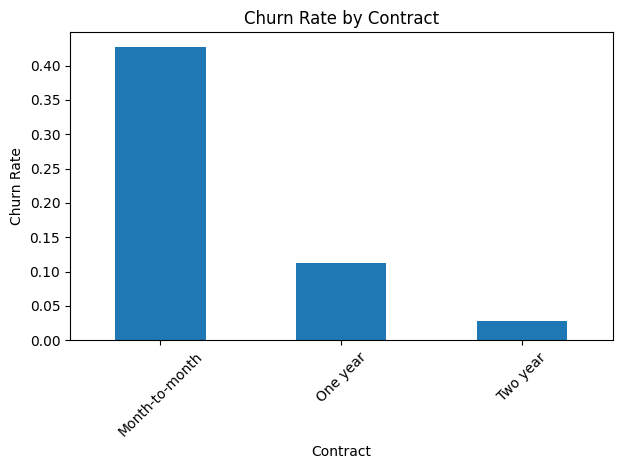

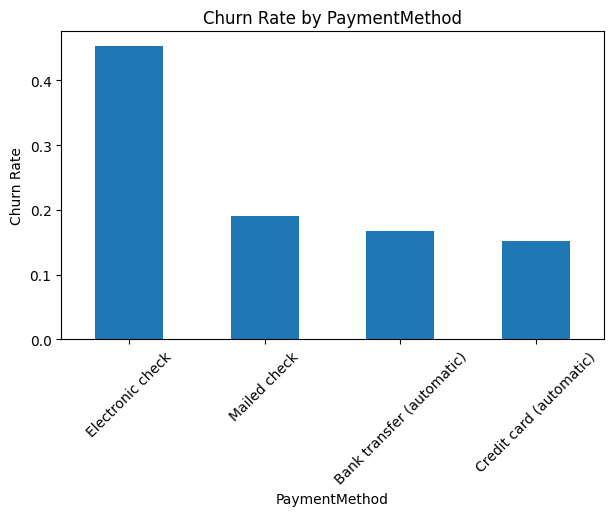

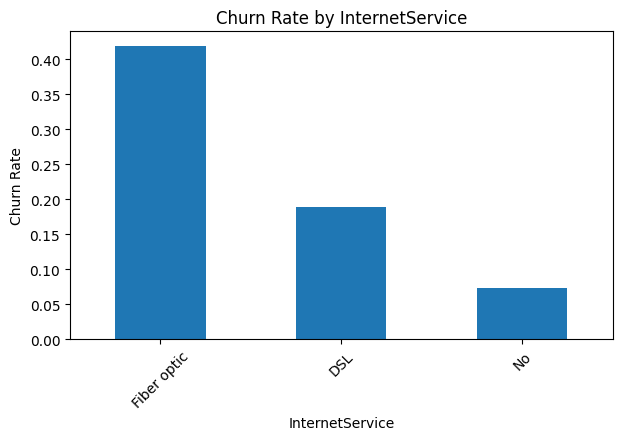

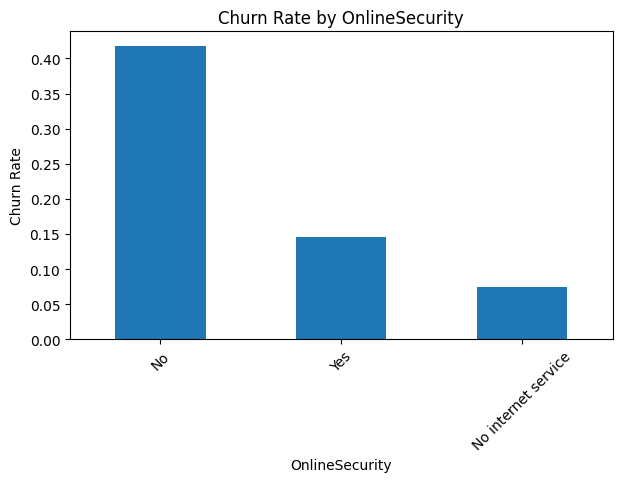

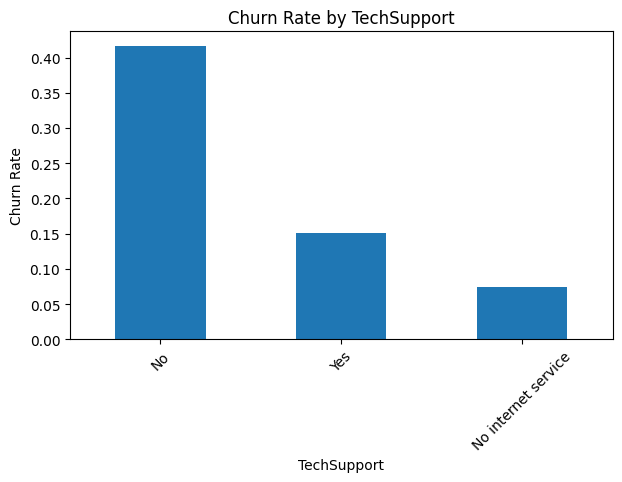

In [ ]:
# sample for plotting if dataset is large to keep it responsive
plot_df = df.sample(n=50000, random_state=42) if len(df) > 50000 else df

plot_cols = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport']
for col in plot_cols:
    if col in plot_df.columns:
        plt.figure(figsize=(7,4))
        (plot_df.groupby(col)['Churn'].mean().sort_values(ascending=False)
                 .plot(kind='bar'))
        plt.ylabel('Churn Rate')
        plt.title(f'Churn Rate by {col}')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
#Identify high-value customers (top 20% LTV) and how many are churning
# determine threshold for top 20%
threshold = df['LTV'].quantile(0.80)
high_value = df[df['LTV'] >= threshold].copy()
hv_count = len(high_value)
hv_churn_count = high_value['Churn'].sum()

print(f"LTV threshold (80th percentile): {threshold:.2f}")
print(f"High-value customers (>= threshold): {hv_count}")
print(f"High-value customers who have churned: {hv_churn_count} ({hv_churn_count / hv_count:.2%})")

# show top few high value churners
cols_show = ['customerID', 'tenure', 'MonthlyCharges', 'LTV', 'Contract', 'PaymentMethod', 'Churn']
available_cols = [c for c in cols_show if c in df.columns]
display(high_value[available_cols].sort_values('LTV', ascending=False).head(20))


LTV threshold (80th percentile): 4463.04
High-value customers (>= threshold): 1409
High-value customers who have churned: 195 (13.84%)


,customerID,tenure,MonthlyCharges,LTV,Contract,PaymentMethod,Churn
4586,7569-NMZYQ,72,118.75,8550.00,Two year,Bank transfer (automatic),0
6118,9924-JPRMC,72,118.20,8510.40,Two year,Electronic check,0
4610,2889-FPWRM,72,117.80,8481.60,One year,Bank transfer (automatic),1
3205,3810-DVDQQ,72,117.60,8467.20,Two year,Bank transfer (automatic),0
6768,9739-JLPQJ,72,117.50,8460.00,Two year,Credit card (automatic),0
4155,6904-JLBGY,72,117.35,8449.20,Two year,Credit card (automatic),0
2368,6650-BWFRT,72,117.15,8434.80,Two year,Credit card (automatic),0
2115,8984-HPEMB,71,118.65,8424.15,Two year,Electronic check,0
5347,9788-HNGUT,72,116.95,8420.40,Two year,Credit card (automatic),0
2025,1488-PBLJN,72,116.85,8413.20,Two year,Bank transfer (automatic),0


In [ ]:
# high-value customers who have churned (or flagged to be at risk if you use model later)
high_value_churners = high_value[high_value['Churn'] == 1]
high_value_churners.to_csv("high_value_churners.csv", index=False)
print("Saved high_value_churners.csv — use this for targeted retention outreach.")


Saved high_value_churners.csv — use this for targeted retention outreach.


In [ ]:
# Simple scoring for "at-risk high-value" using rule-based score
# lightweight risk score combining short tenure & month-to-month contract & high monthly charges
def risk_score(row):
    score = 0
    # short tenure
    if row['tenure'] <= 6: score += 2
    elif row['tenure'] <= 12: score += 1
    # month-to-month contract
    if 'Contract' in df.columns and row.get('Contract') == 'Month-to-month': score += 2
    # high monthly charge (above median)
    if row['MonthlyCharges'] >= df['MonthlyCharges'].median(): score += 1
    return score

# apply to high value customers only (fast because small slice)
if not high_value.empty:
    high_value['risk_score'] = high_value.apply(risk_score, axis=1)
    display(high_value.sort_values(['risk_score','LTV'], ascending=[False, False]).head(20))
else:
    print("No high value customers to score.")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,LTV,risk_score
3820,9481-IEBZY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Credit card (automatic),112.90,8061.50,0,NaN,Very High (106–150),8128.80,3
5252,2615-YVMYX,Male,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Electronic check,107.50,7713.55,0,49–72 months,Very High (106–150),7632.50,3
5702,5287-QWLKY,Male,1,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Credit card (automatic),105.10,7548.10,1,49–72 months,Very High (106–150),7462.10,3
2079,5804-HYIEZ,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Electronic check,106.05,7554.05,0,49–72 months,Very High (106–150),7423.50,3
4447,7821-DPRQE,Male,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Electronic check,107.70,7320.90,0,49–72 months,Very High (106–150),7323.60,3
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Credit card (automatic),111.05,7107.00,0,49–72 months,Very High (106–150),7218.25,3
2879,4550-VBOFE,Male,1,Yes,No,70,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,102.95,7101.50,1,49–72 months,High (71–105),7206.50,3
4395,5502-RLUYV,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,103.95,7446.90,1,49–72 months,High (71–105),7172.55,3
6032,9090-SGQXL,Male,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,105.30,7299.65,1,49–72 months,Very High (106–150),7160.40,3
5004,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,111.15,6953.40,0,49–72 months,Very High (106–150),7113.60,3


In [ ]:
strategies = [
    "1) Prioritize outreach to HIGH-LTV customers who show churn signals (tenure <= 12, month-to-month).",
    "2) Offer targeted incentives for short-tenure users: onboarding discounts, 3-month loyalty credits.",
    "3) Encourage month-to-month customers to switch to 1-year/2-year contracts with sign-up discounts.",
    "4) Create tailored offers for customers on 'Electronic check' payment method (flexible billing options).",
    "5) Promote add-on services (TechSupport, OnlineSecurity) especially to customers without them.",
    "6) Build a retention playbook for high-value at-risk users: call within 7 days, provide a tailored discount, assign a retention manager.",
    "7) Track retention campaign performance with A/B tests and compute ROI per intervention (cost vs LTV saved)."
]
print("\nData-driven Retention Strategy Checklist:\n")
for s in strategies:
    print(s)



Data-driven Retention Strategy Checklist:

1) Prioritize outreach to HIGH-LTV customers who show churn signals (tenure <= 12, month-to-month).
2) Offer targeted incentives for short-tenure users: onboarding discounts, 3-month loyalty credits.
3) Encourage month-to-month customers to switch to 1-year/2-year contracts with sign-up discounts.
4) Create tailored offers for customers on 'Electronic check' payment method (flexible billing options).
5) Promote add-on services (TechSupport, OnlineSecurity) especially to customers without them.
6) Build a retention playbook for high-value at-risk users: call within 7 days, provide a tailored discount, assign a retention manager.
7) Track retention campaign performance with A/B tests and compute ROI per intervention (cost vs LTV saved).


**Visualizations**

In [ ]:
# set style

sns.set(style="whitegrid")


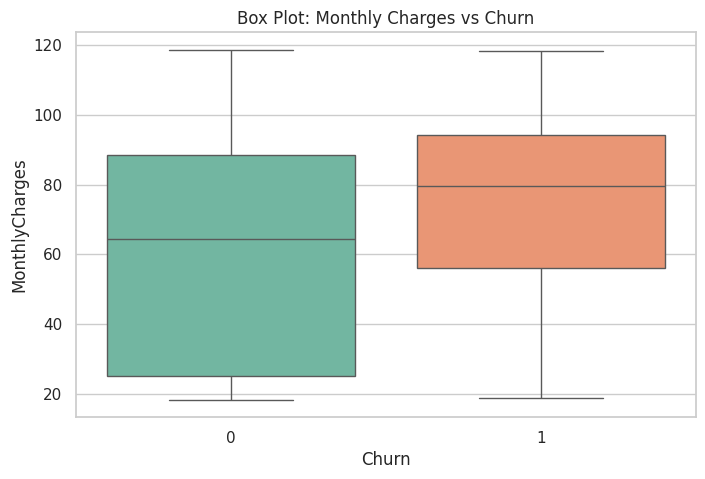

In [ ]:
# Box plot monthly charges vs churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', legend=False)
plt.title('Box Plot: Monthly Charges vs Churn')
plt.show()



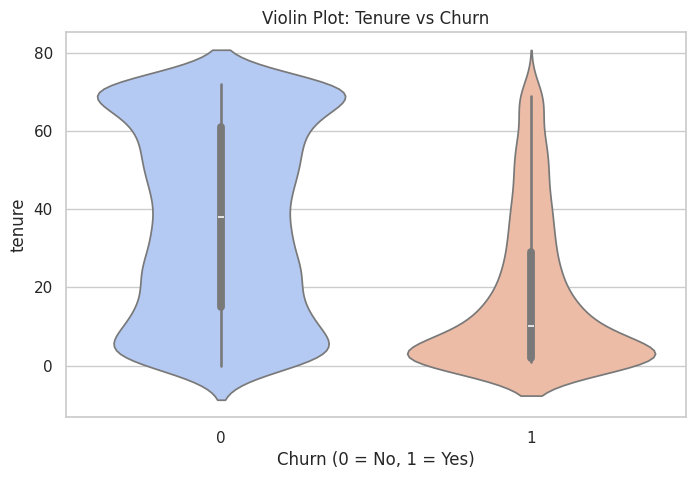

In [ ]:
# Violin plot tenure vs churn
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Churn', y='tenure', hue='Churn', palette='coolwarm', legend=False)
plt.title("Violin Plot: Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.show()


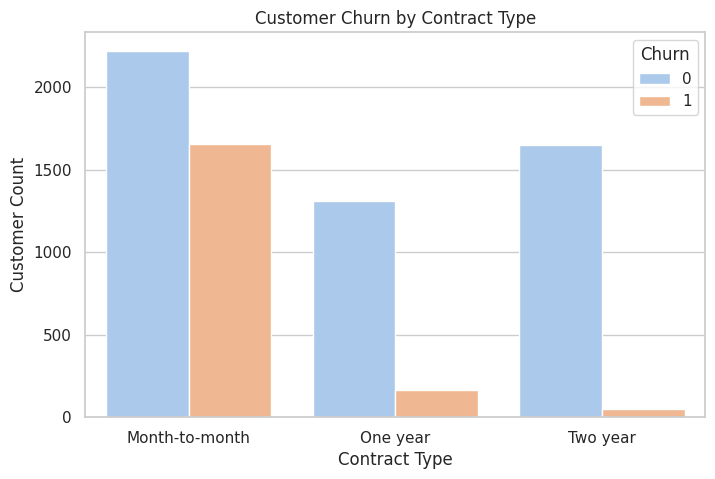

In [ ]:
# Count plot Contract type by churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title("Customer Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()


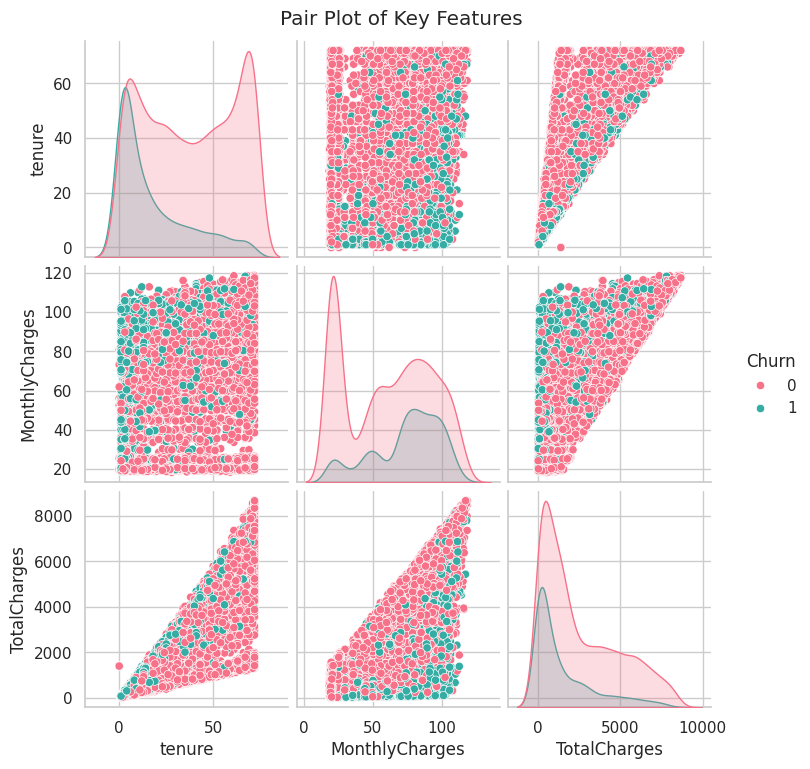

In [ ]:
# Pair plot
selected_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[selected_cols], hue='Churn', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


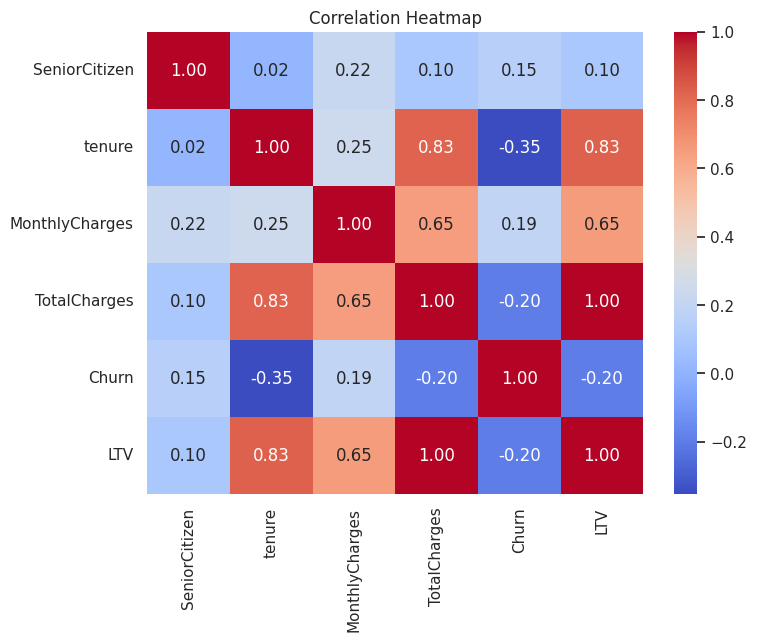

In [ ]:
# heatmap
plt.figure(figsize=(8,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


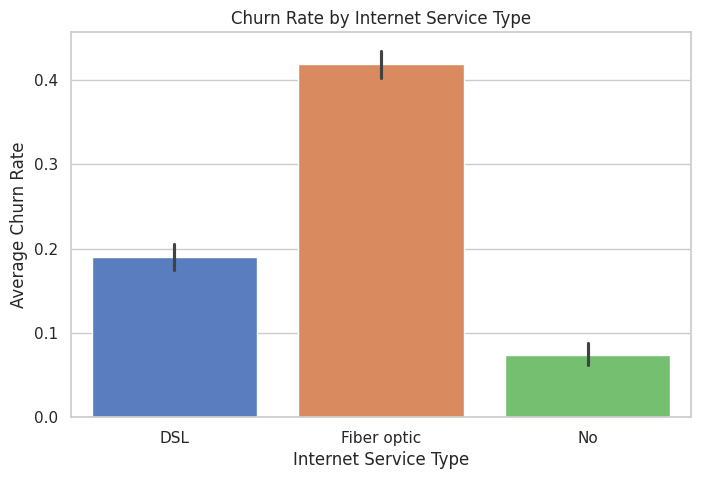

In [ ]:
# Barplot Internet service vs churn
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='InternetService', y='Churn', hue='InternetService', palette='muted', legend=False)
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Average Churn Rate")
plt.xlabel("Internet Service Type")
plt.show()

